In [1]:
import matplotlib.pyplot as plt
import fastf1.plotting
import fastf1 as ff1
import matplotlib.patheffects as pe
import re
from matplotlib.image import imread
from PIL import Image
import numpy as np

In [2]:
ff1.Cache.enable_cache('../cache')
ff1.plotting.setup_mpl()

In [3]:
session = ff1.get_session(2023, 'Azerbaijan', 'Q')
session.load()

core           INFO 	Loading data for Azerbaijan Grand Prix - Qualifying [v2.3.1]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
C:\Users\getou\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort=False)
C:\Users\getou\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
C:\Users\getou\AppData\Local\Programs

In [8]:
driver_1, driver_2 = 'LEC', 'VER'
#distance_min, distance_max = 3000, 4000

laps_driver_1 = session.laps.pick_driver(driver_1)
laps_driver_2 = session.laps.pick_driver(driver_2)

fastest_driver_1 = laps_driver_1.pick_fastest()
fastest_driver_2 = laps_driver_2.pick_fastest()

telemetry_1 = fastest_driver_1.get_telemetry().add_distance()
telemetry_2 = fastest_driver_2.get_telemetry().add_distance()

team_driver_1 = str(fastest_driver_1['Team'])
team_driver_2 = str(fastest_driver_2['Team'])

In [9]:
plot_width = 15
plot_height = 15
plot_size = [plot_width, plot_height]
title_font_size = int(2 * plot_height)  # Adjust the 0.15 multiplier to your liking
axis_label_font_size = int(1.5 * plot_height)  # Adjust the 0.1 multiplier to your liking
plot_title = f"{session.event.year} {session.event.EventName} - {driver_1} VS {driver_2}"
plot_ratios = [7,7]
plot_filename = re.sub(r'\W+', '', plot_title.replace("\n", " ")) + ".png"
logo_path = '../RCKMG_logo.png'
logo_img = Image.open(logo_path)
print(telemetry_2.max())

Date                     2023-04-28 14:26:35.681000
SessionTime                  0 days 01:41:02.259000
DriverAhead                                      11
DistanceToDriverAhead                    570.570278
Time                         0 days 00:01:40.391000
RPM                                           12244
Speed                                           342
nGear                                             8
Throttle                                        100
Brake                                          True
DRS                                              14
Source                                          pos
RelativeDistance                           0.995512
Status                                      OnTrack
X                                              3723
Y                                              3691
Z                                                21
Distance                                5942.280278
dtype: object


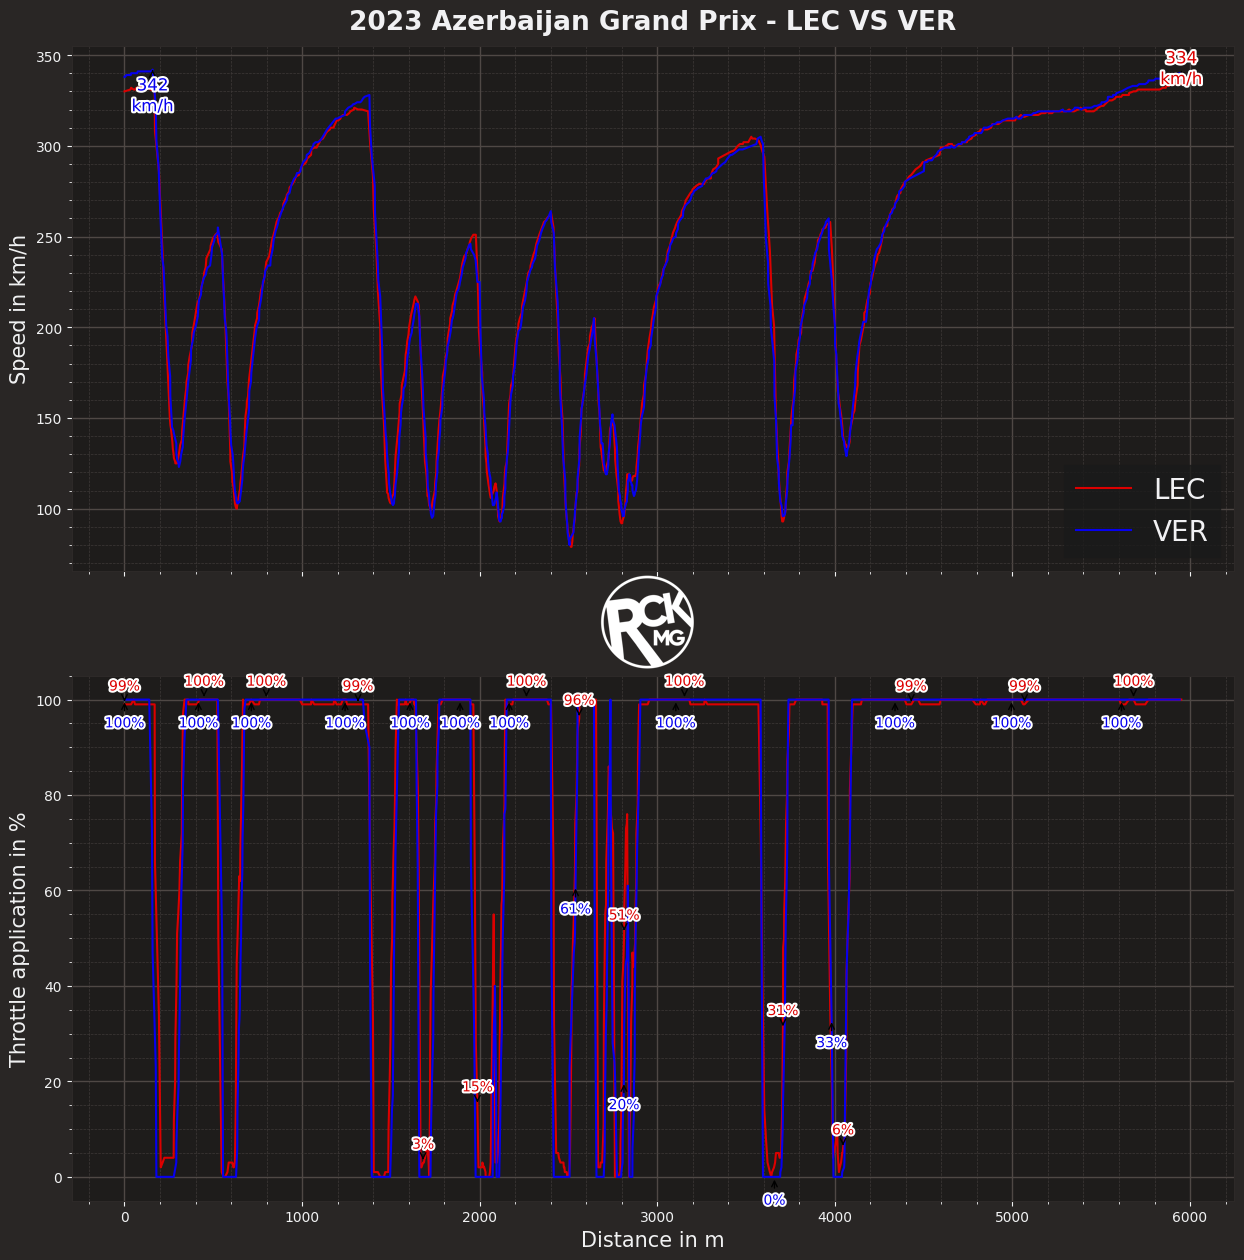

In [16]:
plt.rcParams['figure.figsize'] = plot_size
fig, ax = plt.subplots(2, gridspec_kw={'height_ratios': plot_ratios})

ax[0].plot(telemetry_1['Distance'], telemetry_1['Speed'], color=ff1.plotting.team_color(team_driver_1), label=driver_1)
# ax[0].scatter(telemetry_1.max()['Distance'], telemetry_1.max()['Speed'], marker='o')
# Find max speed for both drivers
max_speed_row_1 = telemetry_1.loc[telemetry_1['Speed'].idxmax()]
max_speed_row_2 = telemetry_2.loc[telemetry_2['Speed'].idxmax()]

x_coord_1 = telemetry_1['Distance'].max()
y_coord_1 = telemetry_1['Speed'].max()

text = f'{y_coord_1}\nkm/h'
ax[0].annotate(text, (x_coord_1, y_coord_1), textcoords="offset points", xytext=(0, 0), ha='center', fontsize=12, color=ff1.plotting.team_color(team_driver_1),arrowprops=dict(facecolor='white', arrowstyle='->')).set_path_effects([pe.withStroke(linewidth=3, foreground='white')])

ax[0].plot(telemetry_2['Distance'], telemetry_2['Speed'], color=ff1.plotting.team_color(team_driver_2), label=driver_2)


# Annotate max speed for driver 2
x_coord_2 = max_speed_row_2['Distance']
y_coord_2 = max_speed_row_2['Speed']
text = f'{y_coord_2}\nkm/h'
ax[0].annotate(text, (x_coord_2, y_coord_2), textcoords="offset points", xytext=(0, -30), ha='center', fontsize=12, color=ff1.plotting.team_color(team_driver_2),arrowprops=dict(facecolor='white', arrowstyle='->')).set_path_effects([pe.withStroke(linewidth=3, foreground='white')])

every_nTH_entry = telemetry_1.iloc[::52]
every_nTH_entry_alo = telemetry_2.iloc[::52]
for index, row in every_nTH_entry.iterrows():
    x_coord = row['Distance']
    y_coord = row['Throttle']
    text = f'{y_coord}%'
    ax[1].annotate(text, (x_coord, y_coord), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=10, color=ff1.plotting.team_color(team_driver_1), arrowprops=dict(facecolor='white', arrowstyle='->')).set_path_effects([pe.withStroke(linewidth=3, foreground='white')])
for index, row in every_nTH_entry_alo.iterrows():
    x_coord = row['Distance']
    y_coord = row['Throttle']
    text = f'{y_coord}%'
    ax[1].annotate(text, (x_coord, y_coord), textcoords="offset points", xytext=(0, -20), ha='center', fontsize=10, color=ff1.plotting.team_color(team_driver_2), arrowprops=dict(facecolor='white', arrowstyle='->')).set_path_effects([pe.withStroke(linewidth=3, foreground='white')])

    
ax[1].plot(telemetry_1['Distance'], telemetry_1['Throttle'], color=ff1.plotting.team_color(team_driver_1), label=driver_1)
ax[1].plot(telemetry_2['Distance'], telemetry_2['Throttle'], color=ff1.plotting.team_color(team_driver_2), label=driver_2)

ax[1].set_xlabel('Distance in m', fontsize=15)
ax[0].set_ylabel('Speed in km/h', fontsize=15)
ax[1].set_ylabel('Throttle application in %', fontsize=15)

ax[0].legend(prop={"size":20})
ax[0].set_title(plot_title, y=1, fontweight='bold')

# Define the new width and height for the logo
new_width = 95
new_height = 95
# Resize the logo
logo_resized = logo_img.resize((new_width, new_height))
logo_resized_np = np.array(logo_resized)
logo_x = 600
logo_y = 590
fig.figimage(logo_resized_np, xo=logo_x, yo=logo_y, zorder=1, origin='upper', alpha=1)

# for i in range(2):
#     ax[i].set_xlim(distance_min, distance_max)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()
plt.savefig(plot_filename, dpi=300)
plt.show()